In [28]:

import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

shared_dir = '/Users/prateek/Desktop/ML/Major/data/'
input_shape = [32, 32]
batch = 32

training_set = image_dataset_from_directory(shared_dir,
                                            validation_split=0.2,
                                            subset="training",
                                            batch_size=batch,
                                            seed=1,
                                            color_mode='rgb',
                                            image_size=input_shape)

val_dataset = image_dataset_from_directory(shared_dir,
                                            validation_split=0.2,
                                            subset="validation",
                                            batch_size=batch,
                                            seed=1,
                                            color_mode='rgb',
                                            image_size=input_shape)

input_shape.append(3)
print(input_shape)

Found 27558 files belonging to 2 classes.
Using 22047 files for training.
Found 27558 files belonging to 2 classes.
Using 5511 files for validation.
[32, 32, 3]


In [29]:
import keras

data_augmentation = keras.Sequential(
    [       tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
            tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)


In [30]:
# import numpy as np
# import matplotlib.pyplot as plt
# from google.colab.patches import cv2_imshow

# for images, labels in training_set.take(1):
#     cv2_imshow(images[0].numpy().astype('int32'))
#     plt.figure(figsize=(12, 12))
#     first_image = images[0]
#     for i in range(12):
#         ax = plt.subplot(3, 4, i + 1)
#         augmented_image = data_augmentation(
#             tf.expand_dims(first_image, 0)
#         )
#         plt.imshow(augmented_image[0].numpy().astype("int32"))
#         plt.axis("off")

In [36]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from keras import Model, Input
from keras.applications.xception import Xception, preprocess_input

epochs = 50
dropout_rate = 0.2
len_classes = 5

inputs = Input(shape=input_shape)
x = data_augmentation(inputs) 
x = preprocess_input(inputs)
x = Conv2D(16, kernel_size=(3, 3),activation='relu',input_shape=input_shape)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(8, kernel_size=(4, 4),activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(4, kernel_size=(3, 3),activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(2, kernel_size=(2, 2),activation='relu')(x)
# x = MaxPooling2D(pool_size=(1, 1))(x)

x = tf.keras.layers.Conv2D(filters=64, kernel_size=1, strides=1)(x)
x = tf.keras.layers.Dropout(dropout_rate)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Conv2D(filters=len_classes, kernel_size=1, strides=1)(x)
x = tf.keras.layers.Dropout(dropout_rate)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.GlobalMaxPooling2D()(x)

x = Flatten()(x)
outputs = Dense(1)(x)
model = Model(inputs, outputs)
model.summary()
model.compile(optimizer='adam', loss=keras.losses.BinaryCrossentropy(from_logits=True),metrics=keras.metrics.BinaryAccuracy())


Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 tf.math.truediv_19 (TFOpLam  (None, 32, 32, 3)        0         
 bda)                                                            
                                                                 
 tf.math.subtract_19 (TFOpLa  (None, 32, 32, 3)        0         
 mbda)                                                           
                                                                 
 conv2d_71 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_61 (MaxPoolin  (None, 15, 15, 16)       0         
 g2D)                                                            
                                                          

In [39]:

history = model.fit(training_set, epochs=epochs, validation_data=val_dataset)

Epoch 1/50
689/689 [==============================] - 10s 15ms/step - loss: 0.0447 - binary_accuracy: 0.9843 - val_loss: 0.0756 - val_binary_accuracy: 0.9750
Epoch 2/50
689/689 [==============================] - 9s 13ms/step - loss: 0.0435 - binary_accuracy: 0.9844 - val_loss: 0.0773 - val_binary_accuracy: 0.9753
Epoch 3/50
689/689 [==============================] - 9s 13ms/step - loss: 0.0442 - binary_accuracy: 0.9835 - val_loss: 0.0917 - val_binary_accuracy: 0.9766
Epoch 4/50
689/689 [==============================] - 9s 13ms/step - loss: 0.0449 - binary_accuracy: 0.9836 - val_loss: 0.0849 - val_binary_accuracy: 0.9750
Epoch 5/50
689/689 [==============================] - 9s 12ms/step - loss: 0.0481 - binary_accuracy: 0.9836 - val_loss: 0.0907 - val_binary_accuracy: 0.9751
Epoch 6/50
689/689 [==============================] - 9s 12ms/step - loss: 0.0437 - binary_accuracy: 0.9843 - val_loss: 0.0748 - val_binary_accuracy: 0.9741
Epoch 7/50
689/689 [==============================] - 8s 

loss
binary_accuracy
val_loss
val_binary_accuracy


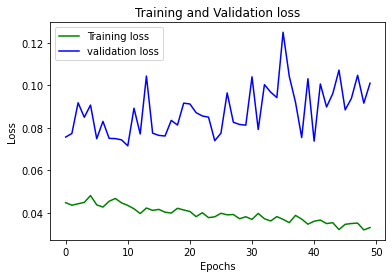

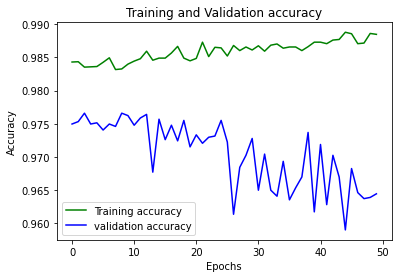

In [62]:
import matplotlib.pyplot as plt

for key in history.history.keys():
    print(key)
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(50)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

loss_train = history.history['binary_accuracy']
loss_val = history.history['val_binary_accuracy']
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [56]:
base_model.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),  
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=tf.keras.metrics.BinaryAccuracy())
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
# rm -rf logs
%load_ext tensorboard
log_folder = 'logs'
callbacks = [
            EarlyStopping(patience = 5),
            TensorBoard(log_dir=log_folder)
            ]

NameError: name 'base_model' is not defined

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
# rm -rf logs
%load_ext tensorboard
log_folder = 'logs'
callbacks = [
            EarlyStopping(patience = 5),
            TensorBoard(log_dir=log_folder)
            ]
model.fit(training_set, epochs=epochs,validation_data=val_dataset,callbacks=callbacks)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Epoch 1/15


2022-03-16 19:20:10.474866: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


663/689 [===========================>..] - ETA: 2s - loss: 0.4163 - binary_accuracy: 0.7972